In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import arabic_reshaper
from bidi.algorithm import get_display

In [2]:

base_url = "https://api.kfmc.med.sa/api/"
endpoints = {
    "satisfaction": "PatientSatisfaction/GetAll",
    "quality": "QualityAccreditations/GetAll",
    "rehab": "RehabilitationServices/GetAll",
    "medical": "MedicalServices/GetAll",
    "patient_services": "PatientsServices/GetAll"
}

dataframes = {}


for key, endpoint in endpoints.items():
    url = base_url + endpoint
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data)
        dataframes[key] = df
        print(f" {key} loaded — shape: {df.shape}")
    else:
        print(f" Failed to load {key}, status: {response.status_code}")


 satisfaction loaded — shape: (4, 7)
 quality loaded — shape: (50, 2)
 rehab loaded — shape: (9, 7)
 medical loaded — shape: (18, 7)
 patient_services loaded — shape: (10, 7)


In [3]:
df_satisfaction = dataframes["satisfaction"]
df_quality = dataframes["quality"]
df_rehab = dataframes["rehab"]
df_medical = dataframes["medical"]
df_patient_services = dataframes["patient_services"]


In [4]:
df_quality.info()
df_satisfaction.info()
df_rehab.info()
df_medical.info()
df_patient_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   QualityData  50 non-null     object
 1   Year         50 non-null     object
dtypes: object(2)
memory usage: 932.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ModuleEN  4 non-null      object 
 1   ModuleAR  4 non-null      object 
 2   2019      4 non-null      float64
 3   2020      4 non-null      float64
 4   2021      4 non-null      float64
 5   2022      4 non-null      float64
 6   2023      4 non-null      float64
dtypes: float64(5), object(2)
memory usage: 356.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 

In [5]:
df_satisfaction.head()


,ModuleEN,ModuleAR,2019,2020,2021,2022,2023
0,Patient Satisfaction,نسبة رضا المرضى في مدينة الملك فهد الطبية,0.8197,0.8345,0.8492,0.8535,0.8637
1,ER Patient Satisfaction,نسبة رضا المرضى في الطوارئ في مدينة الملك فهد ...,0.7390,0.7550,0.7280,0.7360,0.7872
2,Outpatient Satisfaction,نسبة رضا المرضى في العيادات الخارجية في مدينة ...,0.8180,0.8320,0.8530,0.8630,0.8656
3,Inpatient satisfaction,نسبة رضا المرضى في التنويم في مدينة الملك فهد ...,0.8810,0.8820,0.8970,0.8920,0.8856


In [6]:
df_quality.head()

,QualityData,Year
0,ISO-27001-2005 (Info Security),2005
1,ISO-22000 (Food Safety),2008
2,ISO-9001-2008 (Operation),2010
3,CBAHI,2010
4,CARF,2010


In [7]:
df_medical.head()

,ServiceEN,ServiceAR,2019,2020,2021,2022,2023
0,Medical Imaging Cases,عدد فحوصات الأشعة في مدينة الملك فهد الطبية,215349.0,194831.0,235507.0,256226.0,293472.0
1,Number of Clinical Lab Tests,عدد التحاليل المخبرية,6504871.0,7046979.0,9290062.0,10940277.0,11486454.0
2,"In vitro fertilization (IVF) Procedures (OPU, ...",عدد إجراءات الإخصاب في المختبر (IVF),3951.0,2215.0,4514.0,4404.0,4177.0
3,Total Endoscopy Procedures Adult and Pediatric...,عدد إجراءات المناظير للبالغين والأطفال,6803.0,5425.0,7152.0,8364.0,9072.0
4,Number of Diagnostic Endoscopy exams (Adult),عدد فحوصات المناظير التشخيصية للبالغين,5001.0,3813.0,5070.0,6274.0,6753.0


In [8]:
df_rehab.head()

,ServiceEN,ServiceAR,2019,2020,2021,2022,2023
0,The total number of cases in physical medicine...,عدد حالات الطب الفيزيائي والتأهيل في العيادات ...,-,-,29649.0,80519.0,81087.0
1,Total number of cases in physiotherapy (outpat...,عدد حالات العلاج الطبيعي في العيادات الخارجية ...,-,-,66658.0,83369.0,96068.0
2,Total number of cases in occupational therapy ...,عدد حالات العلاج الوظيفي في العيادات الخارجية ...,-,-,31918.0,35507.0,39183.0
3,The total number of cases in speech disorders ...,عدد حالات اضطرابات النطق والتخاطب في العيادات ...,-,-,32779.0,28711.0,24741.0
4,The total number of cases in artificial limbs ...,عدد حالات الأطراف الصناعية في العيادات الخارج...,-,-,7914.0,9240.0,5445.0


In [9]:
df_patient_services.head()

,ServiceEN,ServiceAR,2019,2020,2021,2022,2023
0,Inpatient Admissions,عدد زيارات مرضى التنويم في مدينة الملك فهد الطبية,27768.0,24775.0,25104.0,25151.0,27584.0
1,Outpatient Total Visits,عدد زيارات مرضى العيادات الخارجية في مدينة الم...,517785.0,328038.0,428259.0,491696.0,589138.0
2,Virtual clinic Visits,عدد زيارات العيادة الافتراضية,NaN,NaN,31135.0,55293.0,123869.0
3,Total Number of Patient Accepted at Referral,عدد الإحالات المقبولة في مدينة الملك فهد الطبية,72333.0,51364.0,92542.0,99856.0,130348.0
4,Total of Oncology visits,عدد زيارات مركز الأورام,NaN,40408.0,43586.0,47126.0,56706.0


In [10]:
df_quality['Year'] = pd.to_numeric(df_quality['Year'], errors='coerce')

In [11]:
df_satisfaction.drop(columns=["ModuleEN"], inplace=True)
df_rehab.drop(columns=["ServiceEN"], inplace=True)
df_medical.drop(columns=["ServiceEN"], inplace=True)
df_patient_services.drop(columns=["ServiceEN"], inplace=True)


In [12]:
df_medical.head()

,ServiceAR,2019,2020,2021,2022,2023
0,عدد فحوصات الأشعة في مدينة الملك فهد الطبية,215349.0,194831.0,235507.0,256226.0,293472.0
1,عدد التحاليل المخبرية,6504871.0,7046979.0,9290062.0,10940277.0,11486454.0
2,عدد إجراءات الإخصاب في المختبر (IVF),3951.0,2215.0,4514.0,4404.0,4177.0
3,عدد إجراءات المناظير للبالغين والأطفال,6803.0,5425.0,7152.0,8364.0,9072.0
4,عدد فحوصات المناظير التشخيصية للبالغين,5001.0,3813.0,5070.0,6274.0,6753.0


----------------------------------------------------------------------------------------------------------------

In [13]:
df_satisfaction.info()
df_satisfaction.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ModuleAR  4 non-null      object 
 1   2019      4 non-null      float64
 2   2020      4 non-null      float64
 3   2021      4 non-null      float64
 4   2022      4 non-null      float64
 5   2023      4 non-null      float64
dtypes: float64(5), object(1)
memory usage: 324.0+ bytes


,2019,2020,2021,2022,2023
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.814425,0.825875,0.831800,0.836125,0.850525
std,0.058200,0.052552,0.072521,0.068729,0.043363
min,0.739000,0.755000,0.728000,0.736000,0.787200
25%,0.798250,0.812750,0.818900,0.824125,0.844575
50%,0.818850,0.833250,0.851100,0.858250,0.864650
75%,0.835025,0.846375,0.864000,0.870250,0.870600
max,0.881000,0.882000,0.897000,0.892000,0.885600


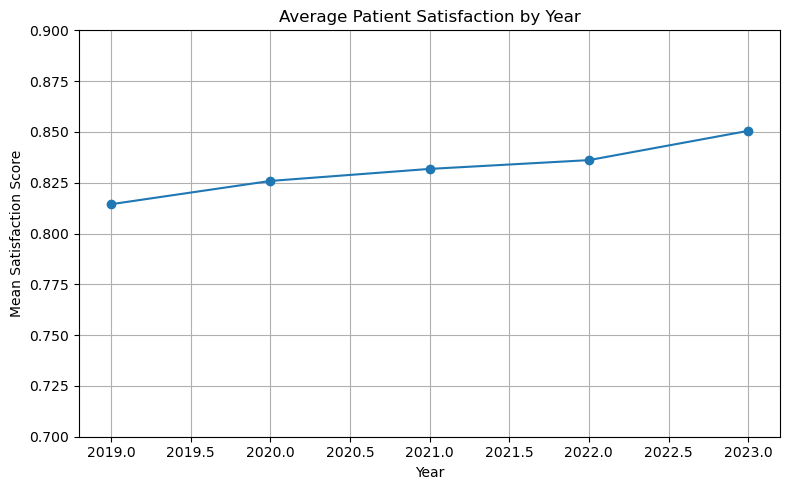

In [57]:
means = df_satisfaction.describe().loc["mean"]

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(means.index.astype(int), means.values, marker='o')
plt.title("Average Patient Satisfaction by Year")
plt.xlabel("Year")
plt.ylabel("Mean Satisfaction Score")
plt.ylim(0.7, 0.9)
plt.grid(True)
plt.tight_layout()
plt.savefig('kfmc1.png',dpi=300)
plt.show()


###  Average Patient Satisfaction Over Time

The line chart above illustrates the **mean patient satisfaction score** from 2019 to 2023. Over the five-year period, a **gradual upward trend** is observed in satisfaction levels:

- In **2019**, the average satisfaction score was approximately **0.815**
- By **2023**, it reached around **0.850**

This steady increase suggests **potential improvements in patient experience**, service quality, or institutional performance. However, further analysis is needed to determine the **causal factors** behind this trend, and whether these improvements are statistically or operationally significant.


--------------------------------------------------

In [15]:
df_satisfaction_long = df_satisfaction.melt(
    id_vars=["ModuleAR"],
    var_name="Year",
    value_name="Satisfaction"
)


In [16]:
df_satisfaction_long["Year"] = df_satisfaction_long["Year"].astype(int)


In [17]:
df_satisfaction_long['ModuleAR'] = df_satisfaction_long['ModuleAR'].apply(
    lambda x: get_display(arabic_reshaper.reshape(x))
)


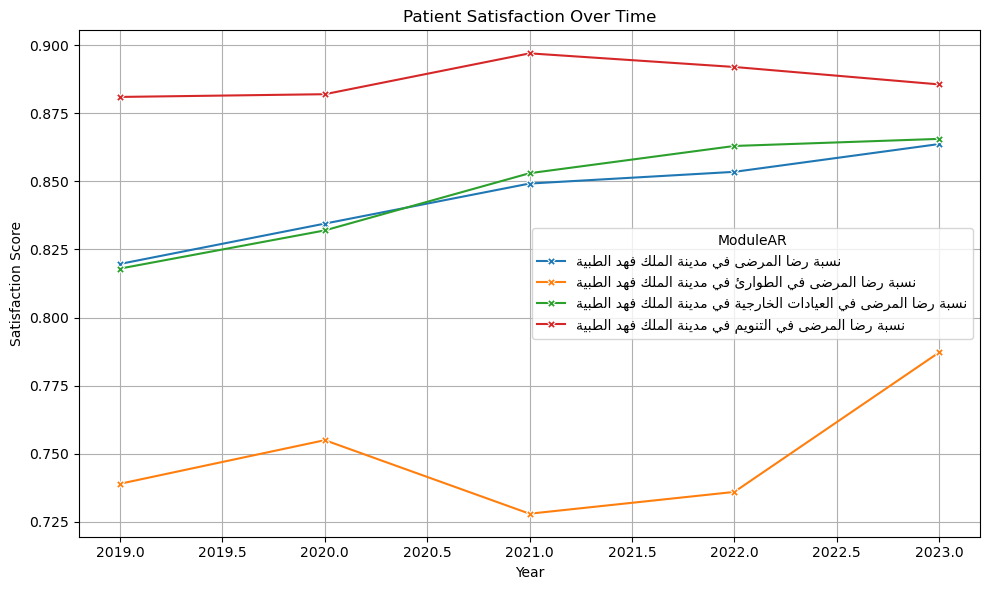

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_satisfaction_long,
    x="Year",
    y="Satisfaction",
    hue="ModuleAR",
    marker="X"
)
plt.title("Patient Satisfaction Over Time")
plt.ylabel("Satisfaction Score")
plt.grid(True)
plt.tight_layout()
plt.savefig('kfmc2.png',dpi=300)
plt.show()


###  Patient Satisfaction Trends by Service Type (King Fahad Medical City)

The chart shows **patient satisfaction scores across different service modules** at King Fahad Medical City (KFMC) from **2019 to 2023**. Key insights:

- 🔴 **Inpatient satisfaction** consistently remained the highest, peaking around **0.898** in 2021, followed by a slight decline in 2023.
- 🟢 **Outpatient satisfaction** showed a steady increase from **0.82 to 0.87**, indicating continuous improvement in clinic services.
- 🔵 **Overall satisfaction** followed a positive upward trend, closely aligned with outpatient feedback.
- 🟠 **Emergency satisfaction** was the lowest throughout the years, with fluctuations. It dropped in 2021 before rebounding in 2023 — suggesting variable patient experiences in the ER.

This breakdown helps identify which departments may need **targeted quality interventions**, particularly the Emergency Department.


In [38]:

def reshape_arabic(text):
    from arabic_reshaper import reshape
    from bidi.algorithm import get_display
    return get_display(reshape(text))


C:\Users\wasee\AppData\Local\Temp\ipykernel_21312\3324854526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_quality, x="Year", palette="Set2")


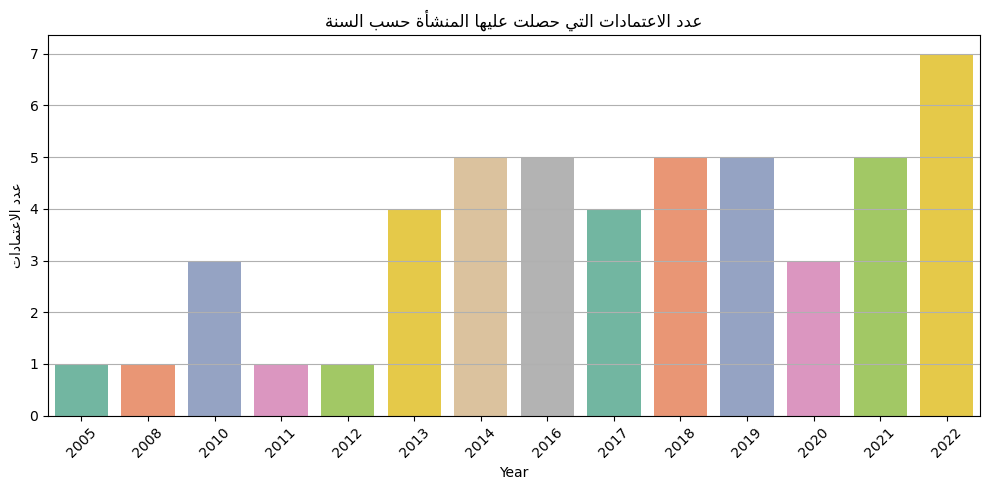

In [59]:
plt.figure(figsize=(10, 5))

sns.countplot(data=df_quality, x="Year", palette="Set2")

plt.title(reshape_arabic("عدد الاعتمادات التي حصلت عليها المنشأة حسب السنة"))
plt.ylabel(reshape_arabic("عدد الاعتمادات"))

plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.savefig('kfmc3.png',dpi=300)
plt.show()


###  Number of Accreditations Obtained by the Facility per Year

This bar chart illustrates the number of accreditations the facility received each year from 2005 to 2022.

####  Key Observations:

- There is a **gradual increase in the number of accreditations** over the years, reflecting ongoing efforts to improve quality and meet standards.
- The year **2022** recorded the highest number of accreditations (7), followed by 2016, 2019, and 2021 (each with 5 accreditations).
- Some years, such as **2005, 2008, 2011, and 2012**, had only one accreditation.
- This upward trend indicates a **positive trajectory in the facility’s performance and readiness to earn multiple accreditations in a single year**.

Such a pattern highlights the organization's commitment to excellence in healthcare quality.


In [21]:
accreditation_counts = df_quality.groupby("Year").size().reset_index(name="Accreditation_Count")


In [22]:
satisfaction_mean = df_satisfaction_long.groupby("Year")["Satisfaction"].mean().reset_index()


In [23]:
merged_df = pd.merge(accreditation_counts, satisfaction_mean, on="Year")


C:\Users\wasee\AppData\Local\Temp\ipykernel_21312\769435175.py:31: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax1.legend(lines, labels, loc='upper left')


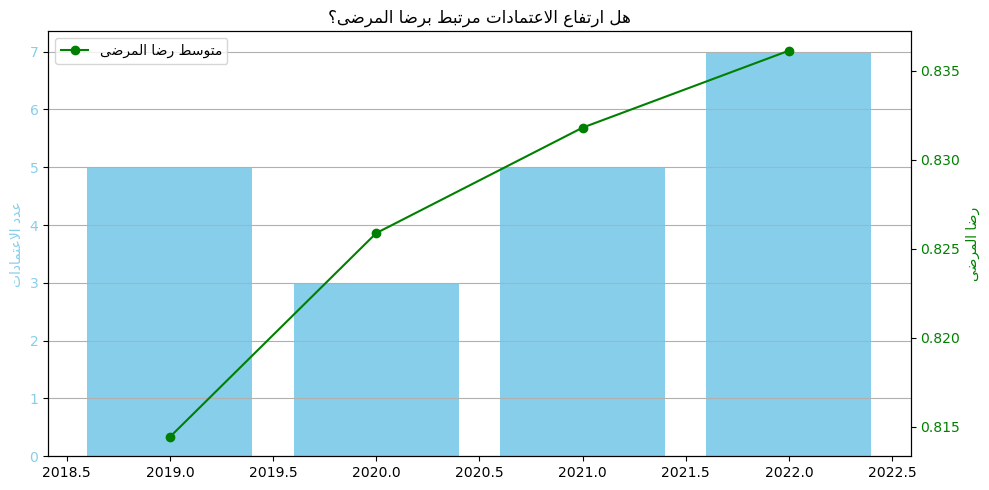

In [60]:
fig, ax1 = plt.subplots(figsize=(10, 5))

bars = ax1.bar(
    merged_df["Year"], 
    merged_df["Accreditation_Count"], 
    color='skyblue', 
    label="عدد الاعتمادات"
)
ax1.set_ylabel(reshape_arabic("عدد الاعتمادات"), color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')


ax2 = ax1.twinx()
line = ax2.plot(
    merged_df["Year"], 
    merged_df["Satisfaction"], 
    color='green', 
    marker='o', 
    label=reshape_arabic("متوسط رضا المرضى")
)
ax2.set_ylabel(reshape_arabic("رضا المرضى"), color='green')
ax2.tick_params(axis='y', labelcolor='green')


plt.title(reshape_arabic("هل ارتفاع الاعتمادات مرتبط برضا المرضى؟"))
ax1.grid(True, axis='y')


lines = list(bars) + list(line)
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.savefig('kfmc4.png',dpi=300)
plt.show()


In [25]:
from scipy.stats import pearsonr, spearmanr
pearson_corr, pearson_p = pearsonr(merged_df["Accreditation_Count"], merged_df["Satisfaction"])
print(f"Pearson correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")


Pearson correlation: 0.445, p-value: 0.555


In [26]:
spearman_corr, spearman_p = spearmanr(merged_df["Accreditation_Count"], merged_df["Satisfaction"])
print(f"Spearman correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")


Spearman correlation: 0.632, p-value: 0.368


###  Is the Rise in Accreditations Associated with Patient Satisfaction?

This combined bar and line chart examines the relationship between the **number of accreditations per year** (blue bars) and the **average patient satisfaction score** (green line) from 2019 to 2022.

####  Visual Insights:
- The number of accreditations fluctuated slightly across the years, peaking in 2022.
- Patient satisfaction shows a steady upward trend over the same period.
- This suggests a **potential positive association**, where years with more accreditations also show higher satisfaction scores.

####  Statistical Correlation:
Two correlation tests were conducted to statistically assess this relationship:

- **Pearson correlation** (measures linear relationship):
  - Correlation coefficient = **0.445**
  - p-value = **0.555** → *Not statistically significant*

- **Spearman correlation** (measures monotonic relationship):
  - Correlation coefficient = **0.632**
  - p-value = **0.368** → *Also not statistically significant*

####  Interpretation:
While the **visual trend** suggests a positive association, the **statistical results** indicate that the correlation is **not strong enough to be statistically significant**. This could be due to the **small number of data points** or other confounding variables.

> Further investigation using more data or advanced modeling may be needed to confirm this relationship.


--------------------------------------------------------------------------------------

In [27]:
df_melted = df_patient_services.melt(
    id_vars=["ServiceAR"],
    var_name="Year",
    value_name="ServiceValue"
)


In [28]:
df_melted

,ServiceAR,Year,ServiceValue
0,عدد زيارات مرضى التنويم في مدينة الملك فهد الطبية,2019,27768.0
1,عدد زيارات مرضى العيادات الخارجية في مدينة الم...,2019,517785.0
2,عدد زيارات العيادة الافتراضية,2019,NaN
3,عدد الإحالات المقبولة في مدينة الملك فهد الطبية,2019,72333.0
4,عدد زيارات مركز الأورام,2019,NaN
5,عدد زيارات رعاية اليوم الواحد الطبية,2019,29085.0
6,عدد زيارات رعاية اليوم الواحد الجراحية,2019,3243.0
7,عدد زيارات الرعاية الصحية المنزلية,2019,30285.0
8,عدد مراجعين الغدد الصماء والسكري- للبالعين,2019,NaN
9,عدد مراجعين الغدد الصماء والسكري-صغار,2019,NaN


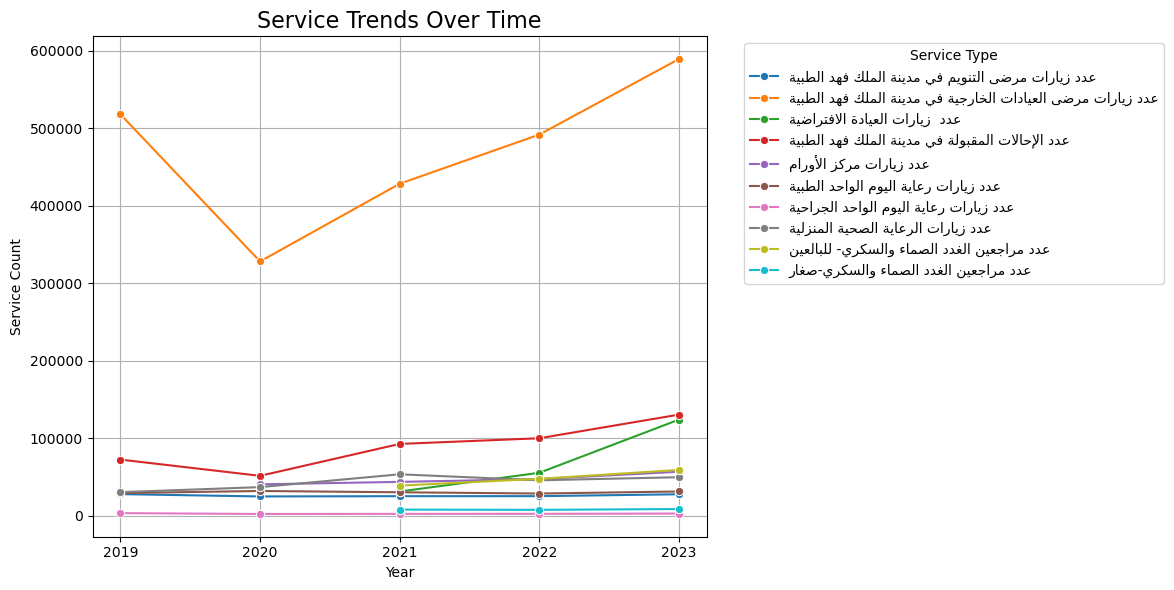

In [61]:
df_melted["ServiceAR_reshaped"] = df_melted["ServiceAR"].apply(reshape_arabic)
plt.figure(figsize=(12, 6)) 
sns.lineplot(
    data=df_melted,
    x="Year",
    y="ServiceValue",
    hue="ServiceAR_reshaped",
    marker="o"
)


plt.title("Service Trends Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Service Count")
plt.legend(title=reshape_arabic("Service Type"), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('kfmc5.png',dpi=300)
plt.show()


## Service Trends Over Time (2019–2023)
This line chart illustrates the yearly service volume across multiple healthcare service types in King Fahad Medical City from 2019 to 2023.

Most services show consistent growth, especially outpatient visits, referrals, and virtual clinic consultations.

Outpatient visits significantly decreased in 2020—likely due to the COVID-19 pandemic—then steadily increased to surpass pre-pandemic levels in 2023.

Referrals and virtual clinic visits began reporting data only from 2021 onwards, which is reflected by missing values (NaN) in 2020. This indicates either a late launch or delayed data availability for these services.

Chronic disease follow-up services (diabetes & endocrinology) for both adults and children also started from 2021, with no records shown in earlier years.

The overall upward trend in most services reflects improved accessibility, digital health integration, and increased patient demand.

⚠️ Note: The missing values (NaN) in 2020 for some services are not anomalies but due to service initiation dates or data recording practices.

----------------------------------------------------------------------------------------------------

In [53]:
df_melted_medical = df_medical.melt(
    id_vars=["ServiceAR"],
    var_name="Year",
    value_name= reshape_arabic("ServiceValue")
)


In [55]:
df_melted_medical = df_melted_medical.dropna(subset=['ServiceValue'])

df_melted_medical.sort_values(reshape_arabic('ServiceValue'), ascending=False)


,ServiceAR,Year,ServiceValue
73,عدد التحاليل المخبرية,2023,11486454.0
55,عدد التحاليل المخبرية,2022,10940277.0
37,عدد التحاليل المخبرية,2021,9290062.0
19,عدد التحاليل المخبرية,2020,7046979.0
1,عدد التحاليل المخبرية,2019,6504871.0
...,...,...,...
80,عدد حالات الأكسجة الغشائية خارج الجسم,2023,41.0
16,عدد عمليات زراعة القوقعة\r\n,2019,39.0
88,عدد عمليات زراعة القوقعة\r\n,2023,30.0
62,عدد حالات الأكسجة الغشائية خارج الجسم,2022,30.0


In [69]:
def get_top_services_data(df, group_col, target_col, n=10):
    """Return dataframe filtered to top N categories by sum of target_col."""
    top_services = df.groupby(group_col)[target_col].sum().nlargest(n).index
    return df[df[group_col].isin(top_services)]


C:\Users\wasee\AppData\Local\Temp\ipykernel_21312\1892673498.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['ServiceAR_reshaped'] = df_top['ServiceAR'].apply(reshape_arabic)


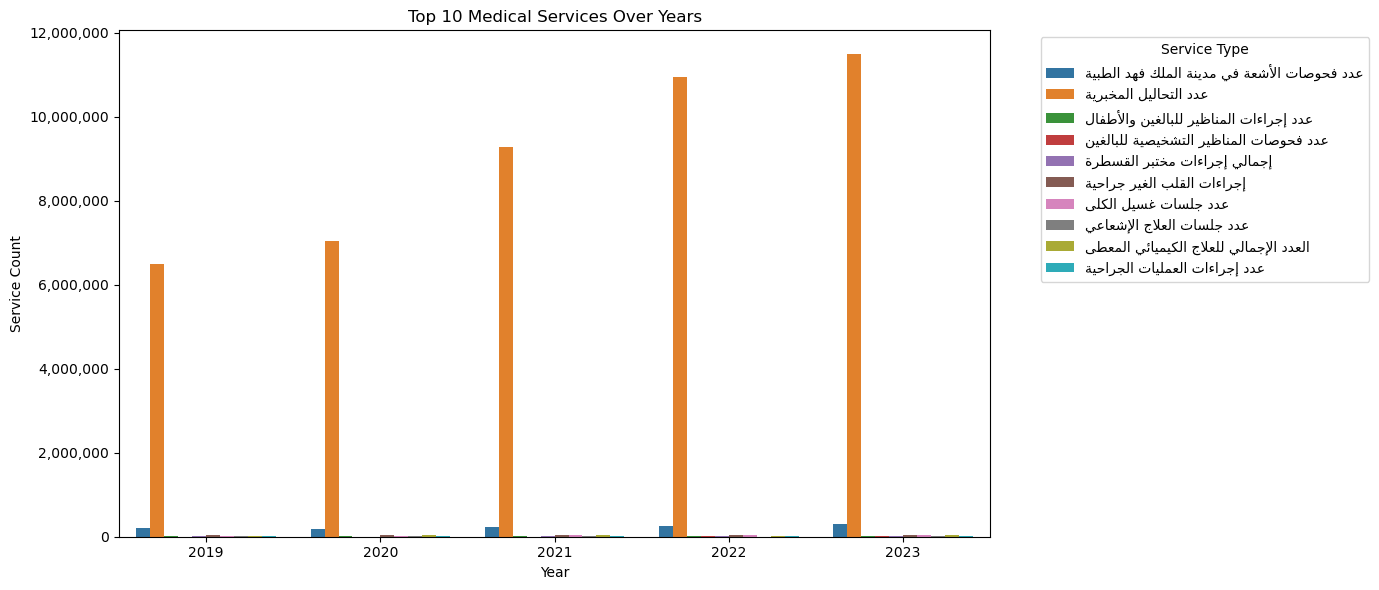

In [72]:

df_melted_medical['ServiceAR_reshaped'] = df_melted_medical['ServiceAR'].apply(reshape_arabic)


df_top = get_top_services_data(df_melted_medical, 'ServiceAR', 'ServiceValue', n=10)


df_top['ServiceAR_reshaped'] = df_top['ServiceAR'].apply(reshape_arabic)

plt.figure(figsize=(14, 6))
sns.barplot(data=df_top, x='Year', y='ServiceValue', hue='ServiceAR_reshaped')

plt.title('Top 10 Medical Services Over Years')
plt.xlabel('Year')
plt.ylabel('Service Count')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.legend(title='Service Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('kfmc6.png', dpi=300)
plt.show()


## Top 10 Medical Services Over the Years (2019–2023)

The bar chart above illustrates the top 10 medical services provided in King Fahd Medical City across five years (2019 to 2023). The services were selected based on the total number of procedures or sessions performed.

### Key Observations:
- **Laboratory tests** dominate with a significantly higher count than any other service, showing steady growth from 6.5 million in 2019 to over 11 million in 2023.
- **Radiological exams, endoscopy procedures, dialysis sessions, and surgical operations** are also among the most frequent services.
- The chart reflects a consistent increase in service volume over the years, indicating a growing demand and expansion in healthcare delivery.
- Services such as **chemotherapy, cardiac catheterization, and non-surgical heart procedures** remain essential but with relatively lower volumes.

> Note: The values are shown in actual counts (not in scientific notation), and Arabic labels were reshaped for proper display.
